In [6]:
import numpy as np


In [9]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [10]:
try:
    path1 = kagglehub.dataset_download("gauravduttakiit/resume-dataset")
    file1 = os.listdir(path1)[0]
    data = os.path.join(path1, file1)
    resumes_df = pd.read_csv(data)
except FileNotFoundError:
    print("Error: Please ensure the file is in the working directory.")
    raise

In [11]:
try:
    path2 = kagglehub.dataset_download("PromptCloudHQ/jobs-on-naukricom")
    file2 = os.listdir(path2)[0]
    dataset = os.path.join(path2, file2)
    jobs_df = pd.read_csv(dataset)
except FileNotFoundError:
    print("Error: Please ensure the file is in the working directory.")
    raise



In [12]:
resumes_df.shape

(962, 2)

In [13]:
resumes_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [14]:
jobs_df.head()

,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [15]:
def eda(resumes_df, jobs_df):
    
    print("--- 1. RESUME DATASET EDA (Robust) ---")
    
    # Check for NaN in 'Category' and handle as 'MISSING'
    resumes_df['category_clean'] = resumes_df['Category'].fillna('MISSING_CATEGORY')
    
    # 1.1 Category Distribution (Handling NaNs)
    category_counts = resumes_df['category_clean'].value_counts()
    print(f"Total Resumes: {len(resumes_df)}")
    print("\nTop 5 Resume Categories (including missing):")
    print(category_counts.head())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(y='category_clean', data=resumes_df, order=category_counts.index, hue='category_clean', palette='rocket')
    plt.title('Distribution of Resume Categories (Robust)')
    plt.show()

    # 1.2 Resume Length Analysis (Handling NaNs and non-strings)
    # Uses the correct column name 'Resume'
    def robust_word_count(text):
        if pd.isna(text) or not isinstance(text, str):
            return 0
        # Simple cleanup: replace multiple spaces/newlines with single space
        cleaned_text = re.sub(r'\s+', ' ', text).strip()
        return len(cleaned_text.split())

    # Apply the function to the correct 'Resume' column:
    resumes_df['word_count_robust'] = resumes_df['Resume'].apply(robust_word_count)
    
    print("\nResume Word Count Summary (Robust):")
    print(resumes_df['word_count_robust'].describe())
    
    # Plotting: Filter out the '0' word counts for clearer histogram of actual resumes
    valid_resumes = resumes_df[resumes_df['word_count_robust'] > 0]
    
    plt.figure(figsize=(8, 4))
    sns.histplot(valid_resumes['word_count_robust'], bins=50, kde=True, color='teal')
    plt.title('Distribution of Resume Word Counts (Robust)')
    plt.xlabel('Word Count')
    plt.show()

    # --- 2. JOB POSTING DATASET EDA (jobs_df) ---
    print("\n--- 2. JOB POSTING DATASET EDA (Robust) ---")
    print(f"Total Job Postings: {len(jobs_df)}")
    # 2.1 Missing Value Report
    print("\nMissing values report (Top 10 columns):")
    missing_pct = jobs_df.isnull().sum().sort_values(ascending=False).head(10) / len(jobs_df) * 100
    print(missing_pct)

    # 2.2 Salary Data Analysis (Handling Non-Numeric/NaT)
    print("\nTop 10 most frequent values in 'pay rate' (Usability Check):")
    print(jobs_df['payrate'].value_counts(dropna=False).head(10))
    
    # 2.3 Skills/Experience Check
    print("\nSample values for 'skills' (Content Check):")
    # Display the first few non-missing values
    print(jobs_df['skills'].dropna().head(5))
    
    print("\nSample values for 'experience' (Content Check):")
    print(jobs_df['experience'].dropna().head(5))

--- 1. RESUME DATASET EDA (Robust) ---
Total Resumes: 962

Top 5 Resume Categories (including missing):
category_clean
Java Developer      84
Testing             70
DevOps Engineer     55
Python Developer    48
Web Designing       45
Name: count, dtype: int64


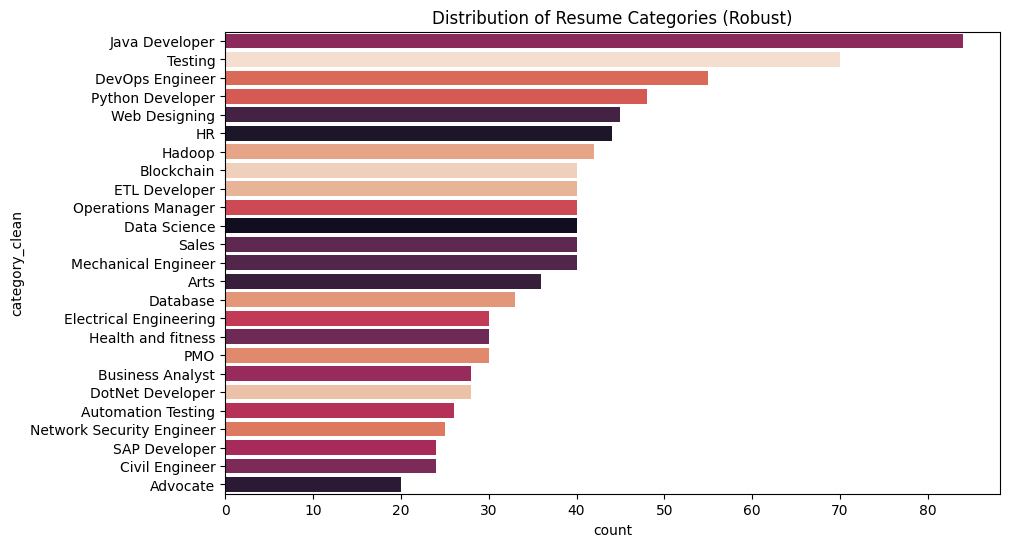


Resume Word Count Summary (Robust):
count     962.000000
mean      450.497921
std       415.868459
min        19.000000
25%       166.000000
50%       329.000000
75%       589.250000
max      2209.000000
Name: word_count_robust, dtype: float64


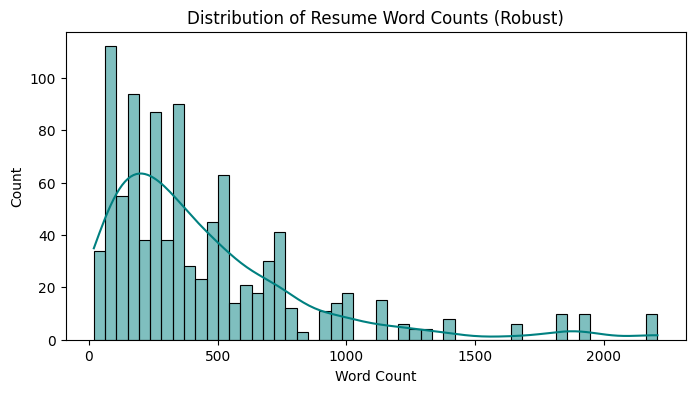


--- 2. JOB POSTING DATASET EDA (Robust) ---
Total Job Postings: 22000

Missing values report (Top 10 columns):
site_name              81.877273
numberofpositions      79.709091
education               9.072727
skills                  2.400000
joblocation_address     2.277273
payrate                 0.440909
postdate                0.104545
industry                0.022727
company                 0.018182
experience              0.018182
dtype: float64

Top 10 most frequent values in 'pay rate' (Usability Check):
payrate
Not Disclosed by Recruiter                                                  15849
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.10,500/p.m.       121
Pay Band: PB4 (Rs.3740067000) with Academic Grade Pay of Rs.9,500/p.m.        116
NaN                                                                            97
Best in the Industry                                                           87
Pay Band: PB3 (Rs.15600-39100) with Academic Grade Pay of Rs.8,

In [16]:
eda(resumes_df, jobs_df)

In [17]:
import kagglehub
import os
import pandas as pd, numpy as np
import torch
import re
from tqdm import tqdm
from fuzzywuzzy import process
import spacy
from sentence_transformers import SentenceTransformer, util
tqdm.pandas()

In [18]:
# Quantized model for embedding generation
model = SentenceTransformer("all-MiniLM-L6-v2", device="cpu")
model.to(torch.float16)

nlp = spacy.load("en_core_web_sm")

In [19]:
resumes = resumes_df.copy()
jobs = jobs_df.copy()

def clean_text(t):
    t = str(t).lower()
    t = re.sub(r"[^a-z0-9\s]", " ", t)
    return re.sub(r"\s+", " ", t).strip()

resumes["clean"] = resumes["Resume"].apply(clean_text)
jobs["clean"] = jobs["jobdescription"].apply(clean_text)

In [20]:
from spacy.pipeline import EntityRuler
ruler = nlp.add_pipe("entity_ruler", before="ner")

patterns = [
    {"label": "SKILL", "pattern": [{"LOWER": s}]} for s in
    ["python","java","docker","sql","react","pytorch","nlp","linux"]
] + [
    {"label": "EDUCATION", "pattern": [{"LOWER": e}]} for e in
    ["bachelor","master","phd","mba","degree"]
]
ruler.add_patterns(patterns)


In [21]:
def extract_entities(text):
    doc = nlp(text)
    ents = {"NAME": None, "EMAIL": None, "PHONE": None, "SKILL": [], "EDUCATION": []}
    # regex bits
    m = re.search(r"[\w\.-]+@[\w\.-]+", text)
    if m: ents["EMAIL"] = m.group(0)
    p = re.search(r"\+?\d[\d\s-]{8,}\d", text)
    if p: ents["PHONE"] = p.group(0)
    for e in doc.ents:
        if e.label_ == "PERSON" and not ents["NAME"]:
            ents["NAME"] = e.text
        elif e.label_ in ["SKILL","EDUCATION"]:
            ents[e.label_].append(e.text.lower())
    return ents

resumes["entities"] = resumes["clean"].progress_apply(extract_entities)
jobs["entities"] = jobs["clean"].progress_apply(extract_entities)


100%|██████████| 22000/22000 [28:04<00:00, 13.06it/s] 


In [22]:
def embed_batch(texts, batch=256):
    embs=[]
    for i in tqdm(range(0,len(texts),batch)):
        chunk = model.encode(texts[i:i+batch], convert_to_tensor=True)
        embs.append(chunk)
    return torch.cat(embs)

resume_emb = embed_batch(resumes["clean"].tolist()).half()
job_emb = embed_batch(jobs["clean"].tolist()).half()

# cosine sim matrix (vectorized)
sim_matrix = util.cos_sim(resume_emb, job_emb)


100%|██████████| 86/86 [26:47:25<00:00, 1121.46s/it]   


In [23]:
def jaccard(a,b):
    if not a or not b: return 0
    a,b=set(a),set(b)
    return len(a&b)/len(a|b)

def edu_match(res,job):
    if not res or not job: return 0
    a=" ".join(res); b=" ".join(job)
    return float(util.cos_sim(model.encode(a), model.encode(b)))

def match_scores(res_idx, job_idx):
    r, j = resumes.iloc[res_idx], jobs.iloc[job_idx]
    s_skill = jaccard(r.entities["SKILL"], j.entities["SKILL"])
    s_edu = edu_match(r.entities["EDUCATION"], j.entities["EDUCATION"])
    s_sem = float(sim_matrix[res_idx][job_idx])
    return round((s_skill*0.6 + s_sem*0.3 + s_edu*0.1)*100,2)


In [24]:
def top_matches_for_job(job_id, k=5):
    scores = sim_matrix[:, job_id].cpu().numpy()
    resumes["score"] = scores
    top = resumes.sort_values("score", ascending=False).head(k)
    return top[["resume_text","score"]]


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

sample = resumes.sample(40, random_state=42)

def heuristic_truth(txt):
    t={"SKILL":[],"EDUCATION":[]}
    for s in ["python","java","sql","docker"]:
        if s in txt: t["SKILL"].append(s)
    for e in ["bachelor","master","phd","mba"]:
        if e in txt: t["EDUCATION"].append(e)
    return t

sample["truth"]=sample["clean"].apply(heuristic_truth)

def evaluate_ner(df):
    y_t,y_p=[],[]
    for _,r in df.iterrows():
        doc=nlp(r.clean)
        pred=[e.text.lower() for e in doc.ents if e.label_ in ["SKILL","EDUCATION"]]
        truth=r.truth["SKILL"]+r.truth["EDUCATION"]
        vocab=set(pred+truth)
        for v in vocab:
            y_t.append(1 if v in truth else 0)
            y_p.append(1 if v in pred else 0)
    return {
        "precision":precision_score(y_t,y_p),
        "recall":recall_score(y_t,y_p),
        "f1":f1_score(y_t,y_p)
    }

metrics = evaluate_ner(sample)
print(metrics)


{'precision': 0.8043478260869565, 'recall': 0.6607142857142857, 'f1': 0.7254901960784313}


In [35]:
%%writefile helpers.py
import re, spacy, torch
from sentence_transformers import SentenceTransformer, util

# load models once
try:
    nlp = spacy.load("saved_models/custom_ner_model")
except:
    nlp = spacy.load("en_core_web_sm")

model = SentenceTransformer("all-MiniLM-L6-v2", device="cpu")
model.to(torch.float16)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    return re.sub(r"\s+", " ", text).strip()

def extract_entities(text):
    doc = nlp(text)
    ents = {"NAME": None, "EMAIL": None, "PHONE": None, "SKILL": [], "EDUCATION": []}
    m = re.search(r"[\w\.-]+@[\w\.-]+", text)
    if m: ents["EMAIL"] = m.group(0)
    p = re.search(r"\+?\d[\d\s-]{8,}\d", text)
    if p: ents["PHONE"] = p.group(0)
    for e in doc.ents:
        if e.label_ == "PERSON" and not ents["NAME"]:
            ents["NAME"] = e.text
        elif e.label_ in ["SKILL", "EDUCATION"]:
            ents[e.label_].append(e.text.lower())
    return ents

def compute_similarity(a, b):
    a_emb = model.encode(a, convert_to_tensor=True)
    b_emb = model.encode(b, convert_to_tensor=True)
    return float(util.cos_sim(a_emb, b_emb))

def generate_feedback(resume, job):
    r_sk = set(resume["entities"]["SKILL"])
    j_sk = set(job["entities"]["SKILL"])
    missing = j_sk - r_sk
    msg = []
    if missing:
        msg.append(f"Add or highlight: {', '.join(missing)}.")
    if not resume["entities"]["EDUCATION"]:
        msg.append("Mention your degree or relevant coursework.")
    if not resume["entities"]["SKILL"]:
        msg.append("Include a clear skills section.")
    if not msg:
        msg.append("Good alignment — polish project descriptions.")
    return " ".join(msg)

print("helpers.py created successfully.")


Overwriting helpers.py


In [ ]:
# pseudo TRAIN_DATA; replace with labeled sentences
TRAIN_DATA=[("John knows Python and Java.",{"entities":[(11,17,"SKILL"),(22,26,"SKILL")]}),]
from spacy.training import Example
optimizer = nlp.initialize()
for epoch in range(15):
    losses={}
    for txt, ann in TRAIN_DATA:
        ex=Example.from_dict(nlp.make_doc(txt), ann)
        nlp.update([ex], sgd=optimizer, losses=losses)
    print(epoch, losses)
nlp.to_disk("custom_ner_model")
